In [1]:
import tensorflow as tf


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("churn_modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## divide the dataset into dependent and independent features

X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [11]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'],drop_first = True).astype(int)

In [12]:
## concatinate these variables with dataframe
X = X.drop(['Geography','Gender'],axis = 1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [20]:
X = pd.concat([X,geography,gender],axis = 1)


In [21]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test  =  train_test_split(X,Y,test_size=0.2,random_state=0)

In [22]:
# Feature Scaaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
x_train.shape

(8000, 11)

# ANN Building

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [26]:
### Initialise ANN 
classifier = Sequential()

## Adding the input layer
classifier.add(Dense(units =11,activation='relu'))

In [27]:
## Adding the first hidden layer
classifier.add(Dense(units =7,activation='relu'))


In [28]:
## adding the second hidden layer
classifier.add(Dense(units=6,activation = 'relu'))

In [29]:
## adding the output layer we using sigmoid cuz of binary classification
classifier.add(Dense(1,activation='sigmoid'))

In [31]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [37]:
## Early stopping: stop training when a models accuracy becomes stagnant
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [38]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8679 - loss: 0.3344 - val_accuracy: 0.8546 - val_loss: 0.3609
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8613 - loss: 0.3410 - val_accuracy: 0.8512 - val_loss: 0.3626


In [39]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

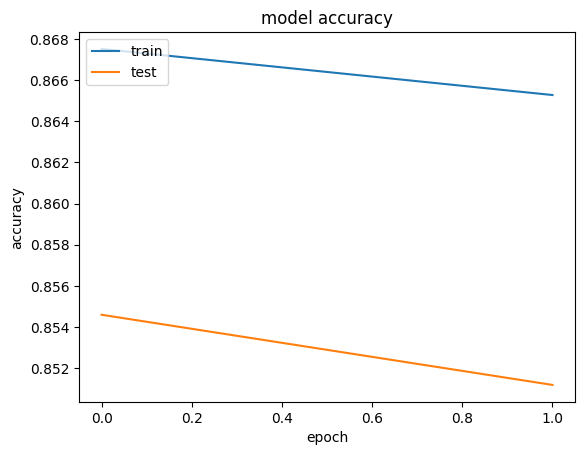

In [40]:
# summarize history for accuracyt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

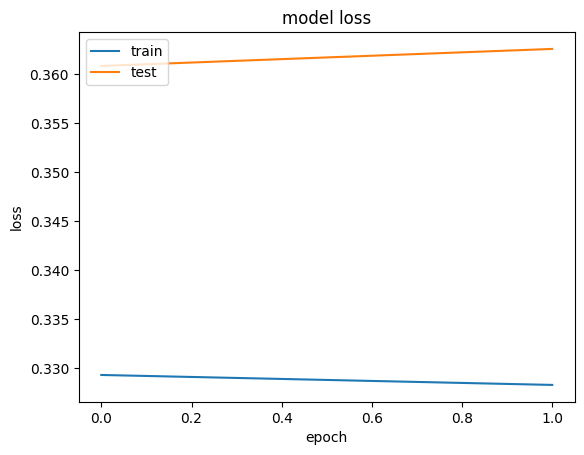

In [41]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [45]:
# part 3 : Making the predictions and evaluating the model

# Predicting the test set results
Y_pred = classifier.predict(x_test)
Y_pred = (Y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [47]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
cm

array([[1513,   82],
       [ 207,  198]])

In [48]:
## calculate the aaccuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_pred,y_test)

In [49]:
score

0.8555

In [50]:
## get the weights
classifier.get_weights()

[array([[ 0.20403326, -0.23542853,  0.07627781, -0.14332755, -0.08339122,
          0.21983412,  0.02314115, -0.53480357,  0.08593716,  0.32851806,
          0.08539527],
        [-0.49105823, -0.24552514,  0.5442811 , -0.16735889, -0.16218954,
         -0.21341023,  0.13359909, -0.42332947,  0.02453123, -0.06507015,
         -0.75931203],
        [-0.07285476, -0.07203873,  0.11938133, -0.5688928 ,  0.05566576,
         -0.08198901, -0.06635883, -0.42396498, -0.00230519,  0.05789194,
          0.11671346],
        [ 0.44502264, -0.2269887 , -0.34612012, -0.67232203,  0.32416257,
         -0.38901052, -0.39486036, -0.06965892,  0.26494005,  0.44378608,
         -0.00396372],
        [-0.18830895,  0.07496659,  0.18358444,  0.2583967 ,  0.08901965,
          0.06045354, -1.169824  , -0.12533127,  0.89265573, -0.59576094,
          0.12270448],
        [ 0.60504067,  0.2342407 ,  0.19090426,  0.5259603 , -0.3732694 ,
         -0.17518611, -0.06318552, -0.4470151 , -0.0363025 , -0.0637057